## Script que faz a redução de dimensionalidade

Este script utiliza diferentes métodos para **redução de dimensionalidade**, permitindo analisar e visualizar dados de alta dimensão de forma mais compreensível. Os métodos aplicados incluem:

- **PCA (Principal Component Analysis)**:  
  Método linear que reduz a dimensionalidade preservando a maior parte da variância nos dados. É rápido, simples e eficaz para dados com estrutura linear, com foco na **preservação das estruturas globais** dos dados.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:  
  Técnica não linear de redução de dimensionalidade, amplamente utilizada para visualização. Prioriza a **preservação de relações locais**, tornando-a ideal para explorar agrupamentos ou padrões em dados complexos.

- **KPCA (Kernel Principal Component Analysis)**:  
  Extensão não linear do PCA, que utiliza funções kernel para capturar relações complexas nos dados. Útil em cenários onde o PCA tradicional não é suficiente. Dependendo do kernel utilizado, pode priorizar tanto estruturas locais quanto globais.

- **UMAP (Uniform Manifold Approximation and Projection)**:  
  Técnica moderna e eficiente que reduz a dimensionalidade **preservando tanto estruturas locais quanto globais**. É rápida, escalável e frequentemente usada para visualização e análise de dados complexos.

---

**1)** Execução Inicial:
O script inicia com a leitura do arquivo:  
**`./saida/04_2_DOU2_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT.parquet`**  
Caso este arquivo não exista, executar o notebook **`04_2_Embedding_SBERT.ipynb`** para gerar os dados necessários.


**2)** Faz a redução de dimensionalidade das colunas => `colunas output`

**PCA**
- **USE_Embeddings1** => `USE_Embeddings1_PCA`
- **USE_Embeddings4** => `USE_Embeddings4_PCA`
- **SBERT_Embeddings1** => `SBERT_Embeddings1_PCA`
- **SBERT_Embeddings4** => `SBERT_Embeddings4_PCA`
  
**KPCA**
- **USE_Embeddings1** => `USE_Embeddings1_KPCA`
- **USE_Embeddings4** => `USE_Embeddings4_KPCA`
- **SBERT_Embeddings1** => `SBERT_Embeddings1_KPCA`
- **SBERT_Embeddings4** => `SBERT_Embeddings4_KPCA`

**t-SNE**
- **USE_Embeddings1** => `USE_Embeddings1_TSNE`
- **USE_Embeddings4** => `USE_Embeddings4_TSNE`
- **SBERT_Embeddings1** => `SBERT_Embeddings1_TSNE`
- **SBERT_Embeddings4** => `SBERT_Embeddings4_TSNE`

**PCA + t-SNE**
- **USE_Embeddings1** => `USE_Embeddings1_PCA_TSNE`
- **USE_Embeddings4** => `USE_Embeddings4_PCA_TSNE`
- **SBERT_Embeddings1** => `SBERT_Embeddings1_PCA_TSNE`
- **SBERT_Embeddings4** => `SBERT_Embeddings4_PCA_TSNE`


**3)** Saída do processamento: **./saida/05_DOU2_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT_Reducao.parquet**

---


## Bibliotecas

In [1]:
# Bibliotecas para manipulação de dados e cálculo
import pandas as pd
import numpy as np
import time  # Para medir o tempo de execução

# Bibliotecas para visualização
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Bibliotecas de aprendizado de máquina
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Biblioteca para redução de dimensionalidade moderna
import umap


In [2]:
douItem = 2
secao = f'Secao0{douItem}'

# Lista das colunas a serem processadas
embedding_columns = ['USE_Embeddings1', 'USE_Embeddings4', 'SBERT_Embeddings1', 'SBERT_Embeddings4']

# Lê o arquivo Parquet
df_portarias_mgi = pd.read_parquet(f'./saida/04_2_DOU{secao}_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT.parquet', engine='pyarrow')  # ou engine='fastparquet'

# Exibe as primeiras linhas do DataFrame
df_portarias_mgi.shape


(19258, 43)

In [3]:
df_portarias_mgi.head()

,id,name,idOficio,pubName,artType,pubDate,artClass,artCategory,artSize,artNotes,...,Texto_sem_nomes,Nomes,TextoTratadoSemNomes,TextoTratadoSemNomes_TotalPalavras,TextoTratadoSemNomesLemmatized,TextoTratadoSemNomesLemmatized_TotalPalavras,USE_Embeddings1,USE_Embeddings4,SBERT_Embeddings1,SBERT_Embeddings4
0,30266027,PORTARIA DE PESSOAL 529,9368436,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,None,"sergio eduardo arbulu, anderson pereira silvy,...","sgp / sedgg / me nº 529 , 17 janeiro 2023 secr...",268,sgp Sedgg nº 529 17 janeiro 2023 secretario ge...,182,"[-0.050729595, -0.01408702, 0.053643852, 0.055...","[-0.04014247, -0.06005167, -0.046900157, 0.053...","[0.0018973409, 0.00027496045, -0.008472635, 0....","[0.0037404527, 0.02638259, -0.009431351, 0.014..."
1,30264410,ATO PORTARIA 655,9368530,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,None,"eliane araujo franklin, eduardo arbulu","portaria sgp / sedgg / me nº 655 , 23 janeiro ...",189,portar sgp Sedgg nº 655 23 janeiro 2023 secret...,127,"[-0.048080508, 0.013370708, 0.05068045, 0.0507...","[-0.030576829, -0.0599243, -0.040472377, 0.061...","[0.0031320648, 0.04834975, 0.0026503482, 0.023...","[-0.01467733, 0.019347021, -0.010744538, 0.015..."
2,30265009,ATO PORTARIA DE PESSOAL 461,9368536,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,None,eduardo arbulu,"sgp / sedgg / me nº 461 , 16 janeiro 2023 secr...",197,sgp Sedgg nº 461 16 janeiro 2023 secretario ge...,132,"[-0.043791097, 0.013420352, 0.05320274, 0.0461...","[-0.019732608, -0.061047755, -0.034037452, 0.0...","[0.020425497, 0.021277025, -0.0023722257, 0.00...","[-0.0044878433, -0.007428834, -0.0057540922, 0..."
3,30265678,ATO PORTARIA DE PESSOAL SGP 606,9368541,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,None,eduardo arbulu,"sgp / sedgg / me nº 606 , 19 janeiro 2023 secr...",187,sgp Sedgg nº 606 19 janeiro 2023 secretario ge...,134,"[-0.045023933, -0.0064749066, 0.03732383, 0.04...","[-0.047755465, -0.06160219, -0.036089916, 0.04...","[0.030839322, 0.04743831, -0.0041385028, 0.029...","[0.03352661, 0.06191006, -0.0019088298, 0.0163..."
4,30266030,ATO PORTARIA DE PESSOAL SGP 517,9368573,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,None,"roberto jorge ferreira, termino exercicio, edu...","sgp / sedgg / me nº 517 , 17 janeiro 2023 secr...",177,sgp Sedgg nº 517 17 janeiro 2023 secretario ge...,122,"[-0.05169902, -0.025740517, 0.04578067, 0.0534...","[-0.049283903, -0.063080825, -0.030478371, 0.0...","[0.025425652, 0.010122777, -0.00616263, 0.0198...","[0.028472634, 0.028629696, -0.008685238, 0.023..."


## PCA

Tempo para extrair os embeddings da coluna USE_Embeddings1: 0.04 segundos
Tempo para redução dimensional (PCA) para USE_Embeddings1: 0.25 segundos


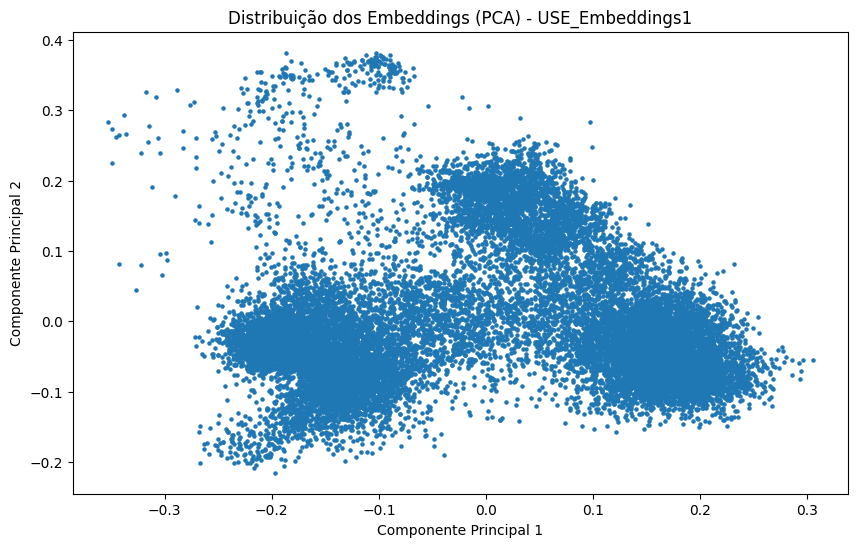

Tempo para extrair os embeddings da coluna USE_Embeddings4: 0.05 segundos
Tempo para redução dimensional (PCA) para USE_Embeddings4: 0.14 segundos


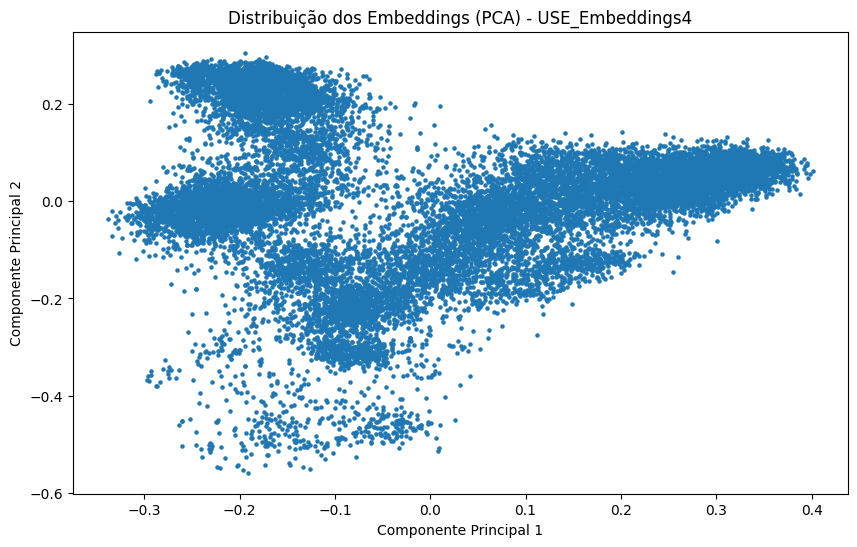

Tempo para extrair os embeddings da coluna SBERT_Embeddings1: 0.06 segundos
Tempo para redução dimensional (PCA) para SBERT_Embeddings1: 0.28 segundos


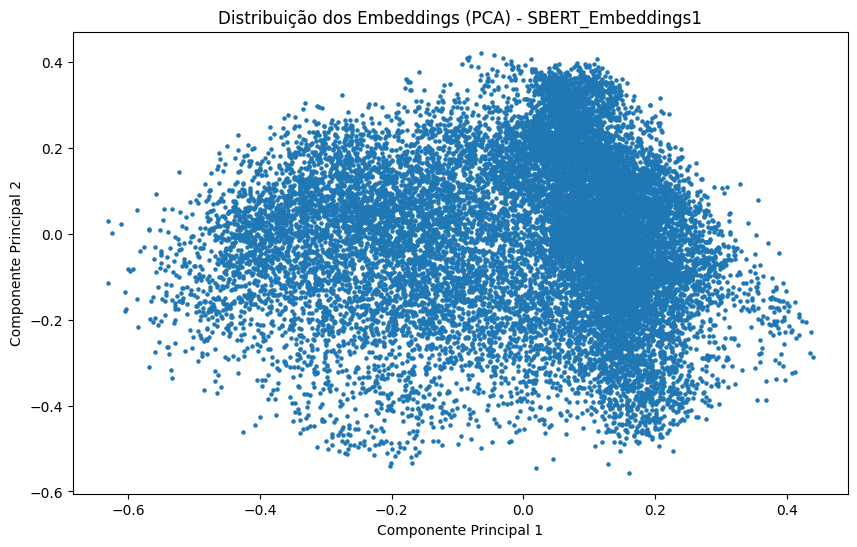

Tempo para extrair os embeddings da coluna SBERT_Embeddings4: 0.04 segundos
Tempo para redução dimensional (PCA) para SBERT_Embeddings4: 0.29 segundos


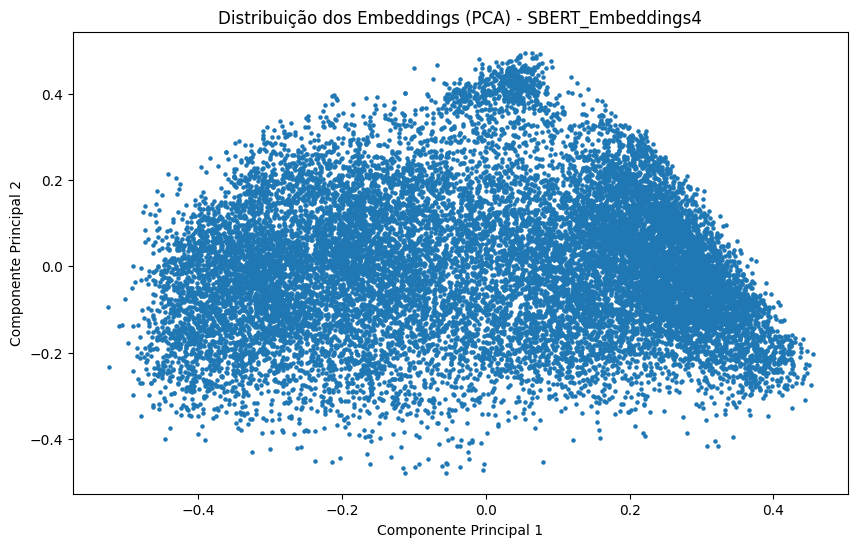

In [9]:
n_dimensions = 2  # Ajuste conforme necessário

# Criar um PCA com 2 componentes
pca = PCA(n_components=n_dimensions)

# Iterar pelas colunas de embeddings e realizar o PCA
for embedding_col in embedding_columns:
    # Medir o tempo de extração dos embeddings
    start_time = time.time()

    # Extrair os embeddings como um array NumPy
    embeddings = np.vstack(df_portarias_mgi[embedding_col])
    extraction_time = time.time() - start_time
    print(f"Tempo para extrair os embeddings da coluna {embedding_col}: {extraction_time:.2f} segundos")

    # Medir o tempo de redução com PCA
    start_time = time.time()
    
    # Reduzir para 2 dimensões com PCA
    embeddings_PCA_2d = pca.fit_transform(embeddings)
    reduction_time = time.time() - start_time
    print(f"Tempo para redução dimensional (PCA) para {embedding_col}: {reduction_time:.2f} segundos")

    # Adicionar os resultados ao DataFrame como uma única coluna
    df_portarias_mgi[f"{embedding_col}_PCA"] = list(embeddings_PCA_2d)

    # Plotar os embeddings reduzidos
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_PCA_2d[:, 0], embeddings_PCA_2d[:, 1], s=5)
    plt.title(f"Distribuição dos Embeddings (PCA) - {embedding_col}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

In [5]:
df_portarias_mgi.shape


(19258, 47)

## Kpca

Tempo para extrair os embeddings da coluna USE_Embeddings1: 0.04 segundos
Tempo para redução dimensional (KPCA) para USE_Embeddings1: 10.09 segundos


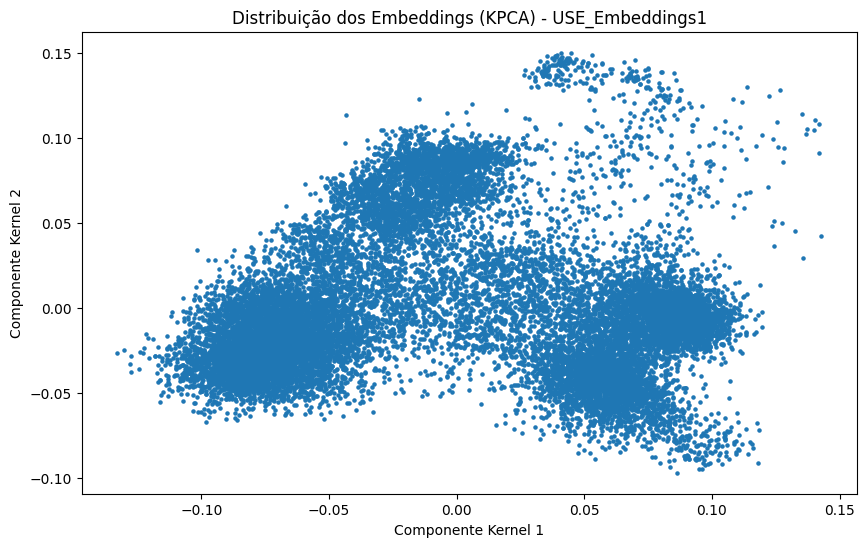

Tempo para extrair os embeddings da coluna USE_Embeddings4: 0.05 segundos
Tempo para redução dimensional (KPCA) para USE_Embeddings4: 11.11 segundos


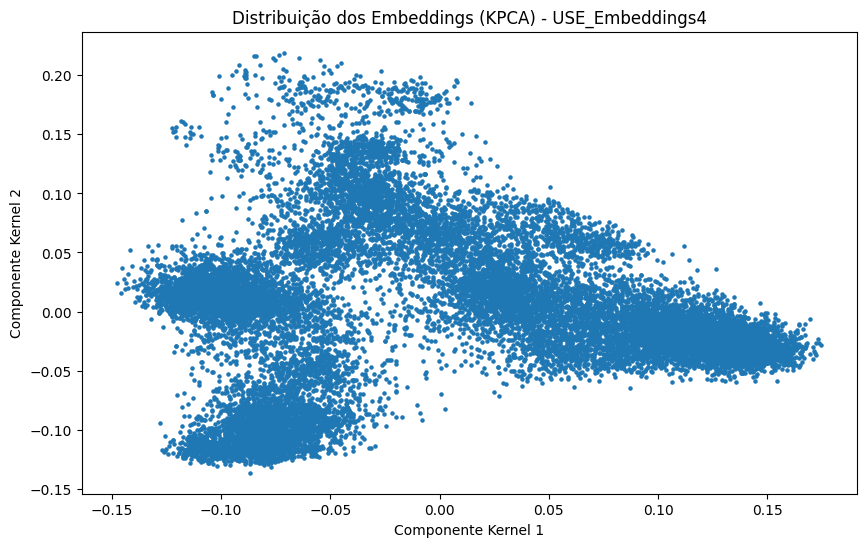

Tempo para extrair os embeddings da coluna SBERT_Embeddings1: 0.08 segundos
Tempo para redução dimensional (KPCA) para SBERT_Embeddings1: 15.65 segundos


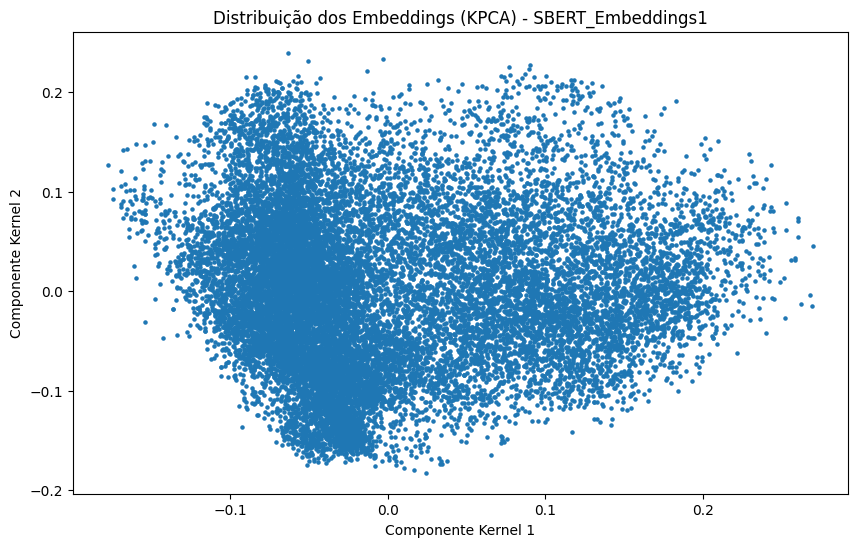

Tempo para extrair os embeddings da coluna SBERT_Embeddings4: 0.05 segundos
Tempo para redução dimensional (KPCA) para SBERT_Embeddings4: 14.00 segundos


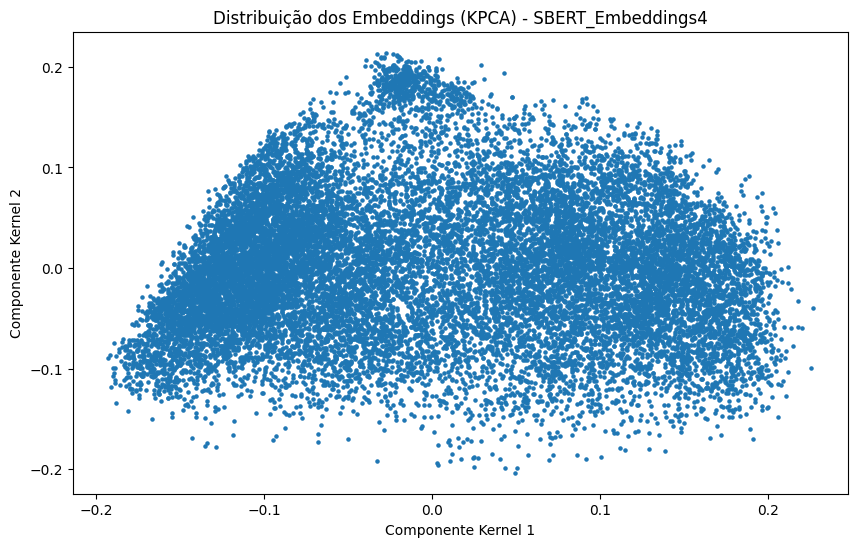

In [10]:
# Número de dimensões para redução com KPCA
n_dimensions = 2  # Ajuste conforme necessário

# Configuração do Kernel PCA
kpca = KernelPCA(n_components=n_dimensions, kernel='rbf', gamma=0.1)  # Usando kernel RBF com gamma=0.1

# Iterar pelas colunas de embeddings e realizar o Kernel PCA
for embedding_col in embedding_columns:
    # Medir o tempo de extração dos embeddings
    start_time = time.time()

    # Extrair os embeddings como um array NumPy
    embeddings = np.vstack(df_portarias_mgi[embedding_col])
    extraction_time = time.time() - start_time
    print(f"Tempo para extrair os embeddings da coluna {embedding_col}: {extraction_time:.2f} segundos")

    # Medir o tempo de redução com KPCA
    start_time = time.time()

    # Reduzir para n dimensões com KPCA
    embeddings_kpca_nd = kpca.fit_transform(embeddings)
    reduction_time = time.time() - start_time
    print(f"Tempo para redução dimensional (KPCA) para {embedding_col}: {reduction_time:.2f} segundos")

    # Adicionar os resultados ao DataFrame como uma única coluna
    df_portarias_mgi[f"{embedding_col}_KPCA"] = list(embeddings_kpca_nd)

    # Plotar as duas primeiras dimensões para visualização
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_kpca_nd[:, 0], embeddings_kpca_nd[:, 1], s=5)
    plt.title(f"Distribuição dos Embeddings (KPCA) - {embedding_col}")
    plt.xlabel("Componente Kernel 1")
    plt.ylabel("Componente Kernel 2")
    plt.show()


## t-SNE

Tempo para extrair os embeddings da coluna USE_Embeddings1: 0.04 segundos
Tempo para redução dimensional (t-SNE) para USE_Embeddings1: 161.75 segundos


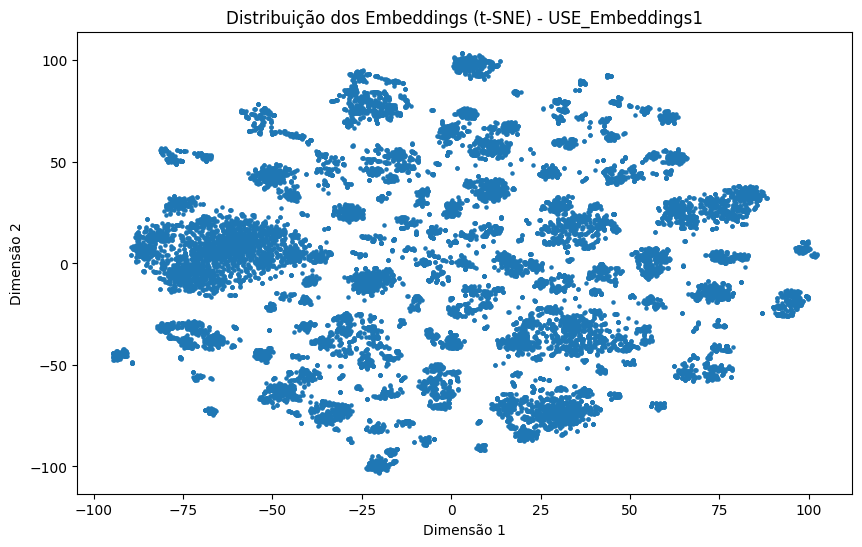

Tempo para extrair os embeddings da coluna USE_Embeddings4: 0.06 segundos
Tempo para redução dimensional (t-SNE) para USE_Embeddings4: 164.53 segundos


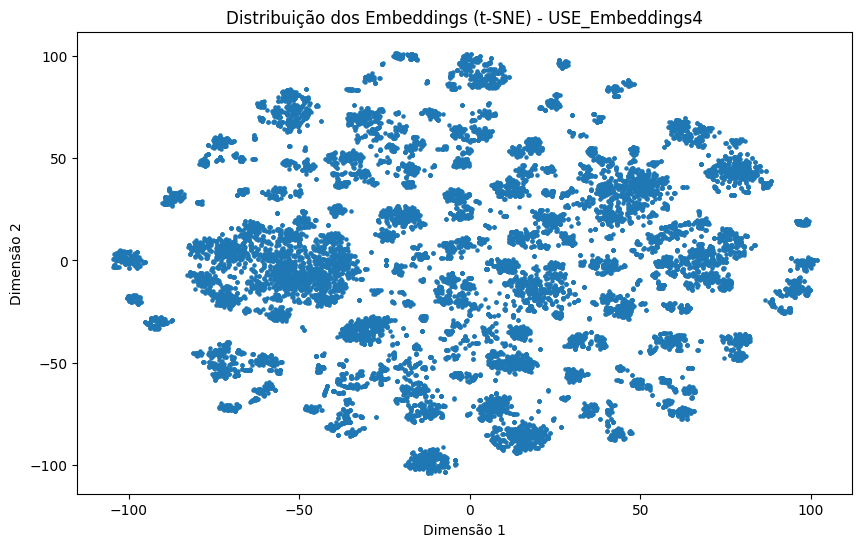

Tempo para extrair os embeddings da coluna SBERT_Embeddings1: 0.07 segundos
Tempo para redução dimensional (t-SNE) para SBERT_Embeddings1: 169.90 segundos


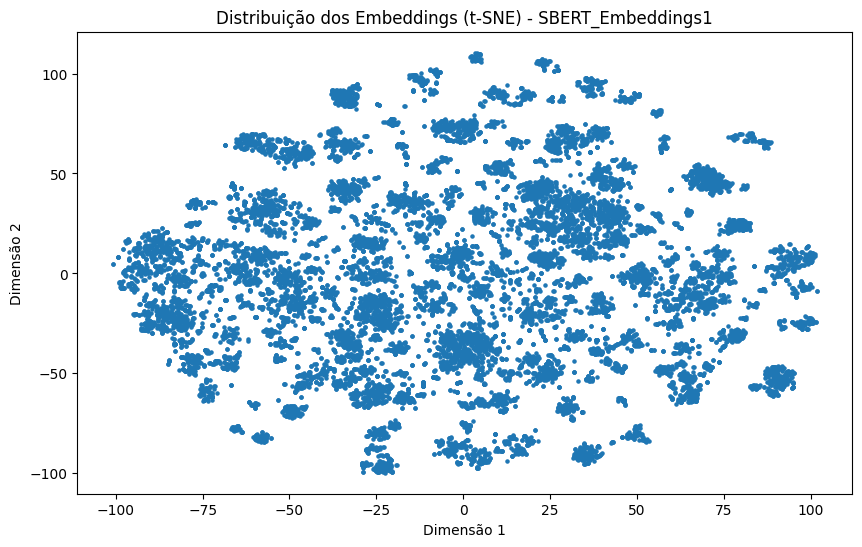

Tempo para extrair os embeddings da coluna SBERT_Embeddings4: 0.07 segundos
Tempo para redução dimensional (t-SNE) para SBERT_Embeddings4: 152.50 segundos


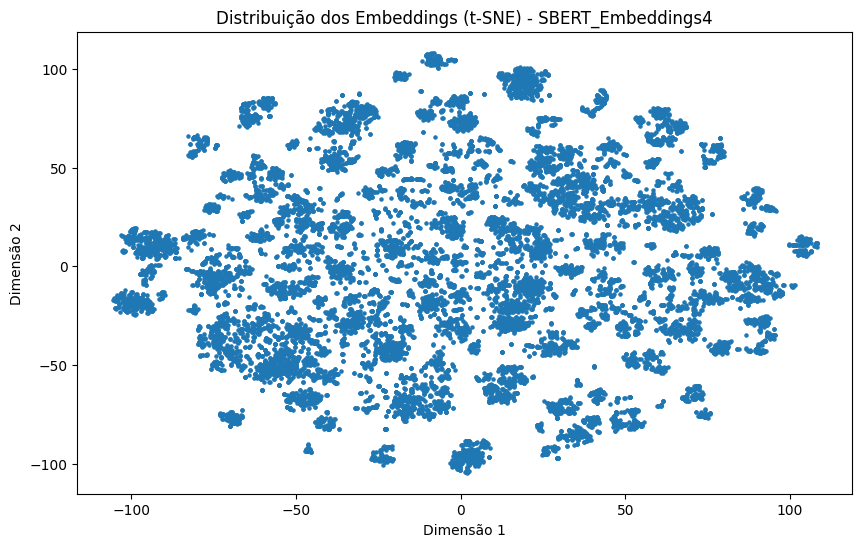

In [6]:
# Parâmetros do t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Iterar pelas colunas de embeddings e realizar o t-SNE
for embedding_col in embedding_columns:
    # Medir o tempo de extração dos embeddings
    start_time = time.time()

    # Extrair os embeddings como um array NumPy
    embeddings = np.vstack(df_portarias_mgi[embedding_col])
    extraction_time = time.time() - start_time
    print(f"Tempo para extrair os embeddings da coluna {embedding_col}: {extraction_time:.2f} segundos")

    # Medir o tempo de redução com t-SNE
    start_time = time.time()

    # Reduzir para 2 dimensões com t-SNE
    embeddings_TSNE_2d = tsne.fit_transform(embeddings)
    reduction_time = time.time() - start_time
    print(f"Tempo para redução dimensional (t-SNE) para {embedding_col}: {reduction_time:.2f} segundos")

    # Adicionar os resultados ao DataFrame como uma única coluna
    df_portarias_mgi[f"{embedding_col}_TSNE"] = list(embeddings_TSNE_2d)

    # Plotar os embeddings reduzidos
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_TSNE_2d[:, 0], embeddings_TSNE_2d[:, 1], s=5)
    plt.title(f"Distribuição dos Embeddings (t-SNE) - {embedding_col}")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")
    plt.show()


In [11]:
df_portarias_mgi.shape

(19258, 55)

## PCA e t-SNE


Processando a coluna: USE_Embeddings1
Tempo para extrair os embeddings: 0.04 segundos
Tempo para redução dimensional (PCA): 0.15 segundos
Tempo para redução dimensional (t-SNE): 152.96 segundos


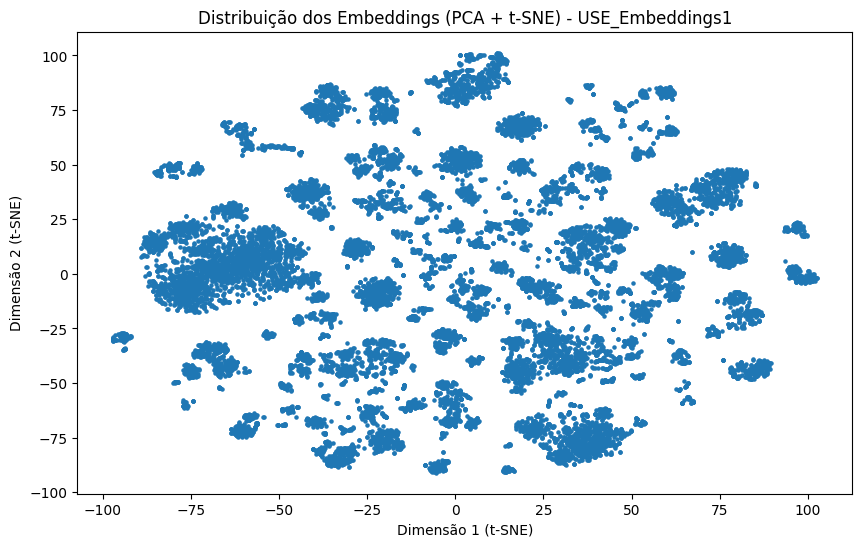


Processando a coluna: USE_Embeddings4
Tempo para extrair os embeddings: 0.07 segundos
Tempo para redução dimensional (PCA): 0.18 segundos
Tempo para redução dimensional (t-SNE): 154.11 segundos


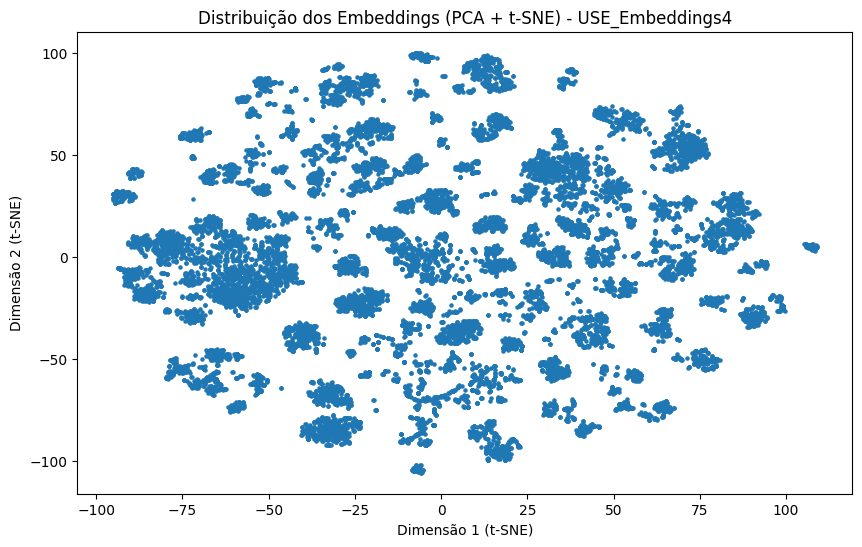


Processando a coluna: SBERT_Embeddings1
Tempo para extrair os embeddings: 0.09 segundos
Tempo para redução dimensional (PCA): 0.36 segundos
Tempo para redução dimensional (t-SNE): 162.65 segundos


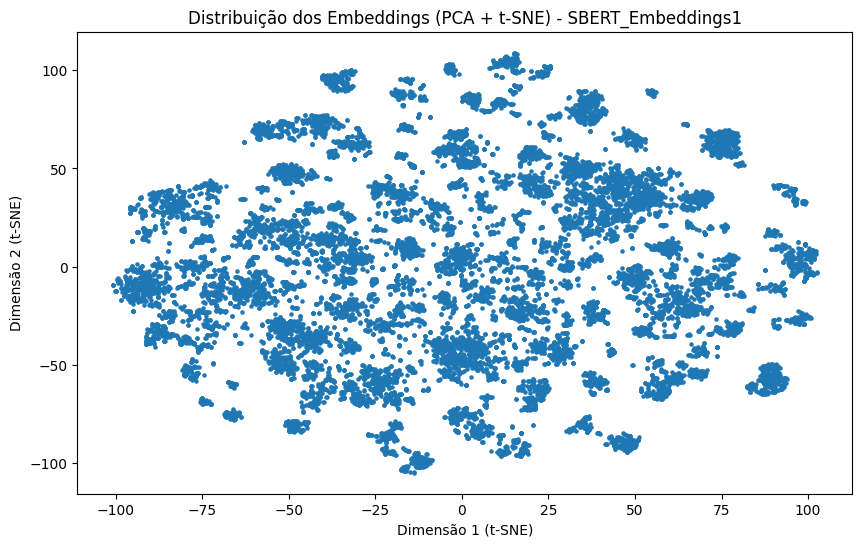


Processando a coluna: SBERT_Embeddings4
Tempo para extrair os embeddings: 0.07 segundos
Tempo para redução dimensional (PCA): 0.31 segundos
Tempo para redução dimensional (t-SNE): 171.91 segundos


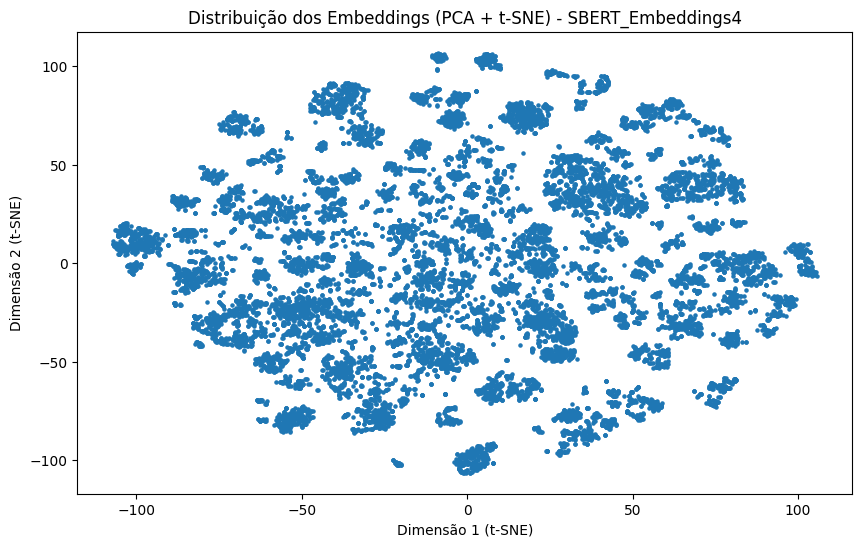

In [12]:
# Parâmetros do PCA e t-SNE
n_pca_components = 50  # Número intermediário de dimensões com PCA
n_tsne_components = 2  # Reduzir para 2 dimensões com t-SNE

# Iterar pelas colunas de embeddings
for embedding_col in embedding_columns:
    print(f"\nProcessando a coluna: {embedding_col}")
    
    # Etapa 1: Extração dos embeddings
    start_time = time.time()
    embeddings = np.vstack(df_portarias_mgi[embedding_col])  # Extrair embeddings como array NumPy
    extraction_time = time.time() - start_time
    print(f"Tempo para extrair os embeddings: {extraction_time:.2f} segundos")
    
    # Etapa 2: Reduzir dimensionalidade com PCA
    start_time = time.time()
    pca = PCA(n_components=n_pca_components)
    embeddings_pca = pca.fit_transform(embeddings)
    pca_time = time.time() - start_time
    print(f"Tempo para redução dimensional (PCA): {pca_time:.2f} segundos")
    
    # Etapa 3: Reduzir ainda mais com t-SNE
    start_time = time.time()
    tsne = TSNE(n_components=n_tsne_components, perplexity=30, random_state=42)
    embeddings_pca_tsne = tsne.fit_transform(embeddings_pca)
    tsne_time = time.time() - start_time
    print(f"Tempo para redução dimensional (t-SNE): {tsne_time:.2f} segundos")
    
    # Adicionar os resultados ao DataFrame como uma única coluna
    df_portarias_mgi[f"{embedding_col}_PCA_TSNE"] = list(embeddings_pca_tsne)
    
    # Plotar os embeddings reduzidos
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_pca_tsne[:, 0], embeddings_pca_tsne[:, 1], s=5)
    plt.title(f"Distribuição dos Embeddings (PCA + t-SNE) - {embedding_col}")
    plt.xlabel("Dimensão 1 (t-SNE)")
    plt.ylabel("Dimensão 2 (t-SNE)")
    plt.show()


In [13]:
df_portarias_mgi.shape

(19258, 59)

## UMAP


Processando a coluna: USE_Embeddings1
Tempo para extrair os embeddings: 0.05 segundos


C:\Users\aqcor\anaconda3\envs\PPCA_MD\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tempo para redução dimensional (UMAP) para USE_Embeddings1: 97.42 segundos


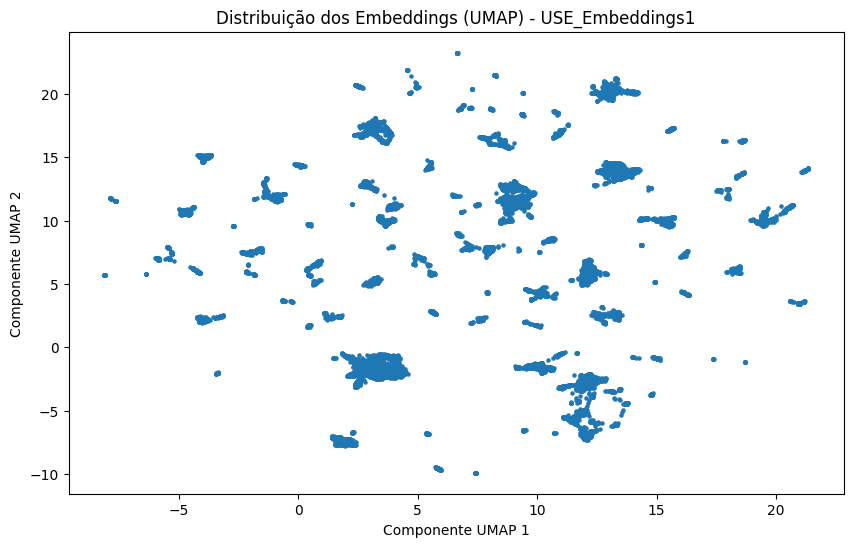


Processando a coluna: USE_Embeddings4
Tempo para extrair os embeddings: 0.09 segundos


C:\Users\aqcor\anaconda3\envs\PPCA_MD\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tempo para redução dimensional (UMAP) para USE_Embeddings4: 42.16 segundos


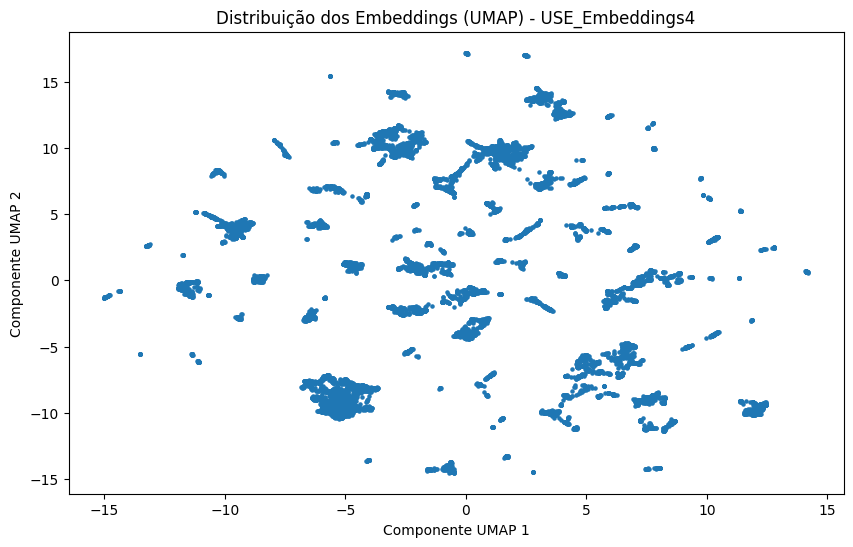


Processando a coluna: SBERT_Embeddings1
Tempo para extrair os embeddings: 0.04 segundos


C:\Users\aqcor\anaconda3\envs\PPCA_MD\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tempo para redução dimensional (UMAP) para SBERT_Embeddings1: 42.95 segundos


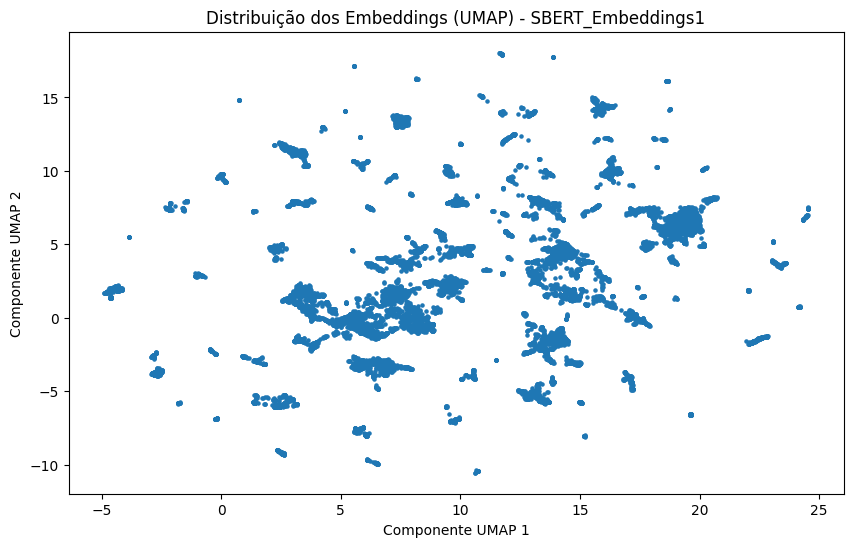


Processando a coluna: SBERT_Embeddings4
Tempo para extrair os embeddings: 0.12 segundos


C:\Users\aqcor\anaconda3\envs\PPCA_MD\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tempo para redução dimensional (UMAP) para SBERT_Embeddings4: 41.50 segundos


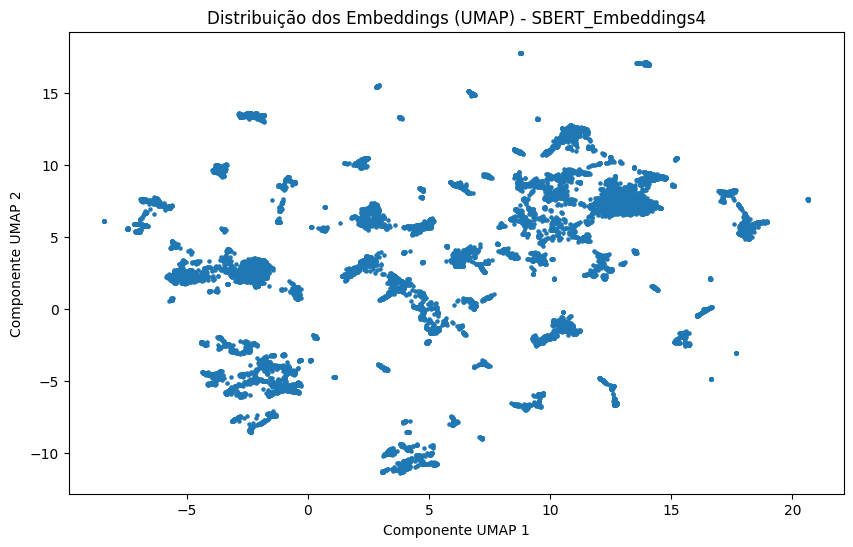

In [14]:
# Configuração do UMAP
n_components = 2  # Dimensões reduzidas
umap_params = {
    "n_components": n_components,
    "n_neighbors": 15,
    "min_dist": 0.1,
    "random_state": 42
}

# Processar cada coluna de embeddings
for embedding_col in embedding_columns:
    print(f"\nProcessando a coluna: {embedding_col}")

    # Etapa 1: Extração dos embeddings
    start_time = time.time()
    embeddings = np.vstack(df_portarias_mgi[embedding_col])  # Extrair embeddings como array NumPy
    extraction_time = time.time() - start_time
    print(f"Tempo para extrair os embeddings: {extraction_time:.2f} segundos")

    # Etapa 2: Reduzir dimensionalidade com UMAP
    start_time = time.time()
    umap_model = umap.UMAP(**umap_params)
    embeddings_umap_2d = umap_model.fit_transform(embeddings)
    reduction_time = time.time() - start_time
    print(f"Tempo para redução dimensional (UMAP) para {embedding_col}: {reduction_time:.2f} segundos")

    # Adicionar os resultados ao DataFrame como uma única coluna
    df_portarias_mgi[f"{embedding_col}_UMAP"] = list(embeddings_umap_2d)

    # Plotar os embeddings reduzidos
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_umap_2d[:, 0], embeddings_umap_2d[:, 1], s=5)
    plt.title(f"Distribuição dos Embeddings (UMAP) - {embedding_col}")
    plt.xlabel("Componente UMAP 1")
    plt.ylabel("Componente UMAP 2")
    plt.show()


In [15]:
df_portarias_mgi.shape

(19258, 63)

In [16]:
df_portarias_mgi.head()

,id,name,idOficio,pubName,artType,pubDate,artClass,artCategory,artSize,artNotes,...,SBERT_Embeddings1_KPCA,SBERT_Embeddings4_KPCA,USE_Embeddings1_PCA_TSNE,USE_Embeddings4_PCA_TSNE,SBERT_Embeddings1_PCA_TSNE,SBERT_Embeddings4_PCA_TSNE,USE_Embeddings1_UMAP,USE_Embeddings4_UMAP,SBERT_Embeddings1_UMAP,SBERT_Embeddings4_UMAP
0,30266027,PORTARIA DE PESSOAL 529,9368436,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,"[0.016321918, 0.07024405]","[0.014584291, 0.04337406]","[-16.726706, 56.970505]","[13.92976, -91.40009]","[0.7567154, -73.164856]","[6.9597764, -70.976524]","[13.159501, 2.6076024]","[-2.5174575, -2.1294782]","[2.8837821, -5.633801]","[4.4205976, 5.3656497]"
1,30264410,ATO PORTARIA 655,9368530,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,"[0.008526144, 0.009507837]","[-0.026086908, -0.073050216]","[-39.248245, 74.718]","[-31.301977, -77.763405]","[-8.304266, -38.56507]","[23.96577, -36.566616]","[8.013924, 7.6135964]","[0.0643677, -4.1535616]","[14.249727, 4.997593]","[2.3798013, 6.2923975]"
2,30265009,ATO PORTARIA DE PESSOAL 461,9368536,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,"[0.00028666237, 0.04367776]","[-0.027844444, -0.11997401]","[-39.27794, 74.63971]","[-31.275515, -77.7285]","[-5.679678, -33.73889]","[22.499407, -35.780396]","[8.013194, 7.5345373]","[0.16797487, -4.068984]","[14.227807, 4.8963118]","[2.4286757, 6.2753396]"
3,30265678,ATO PORTARIA DE PESSOAL SGP 606,9368541,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,"[-0.004174391, -0.0033765337]","[0.052405372, 0.034986008]","[-3.7416568, 82.783745]","[-68.57696, -53.742702]","[22.567476, 19.76176]","[-38.07335, 68.46514]","[2.7796974, 17.19619]","[-1.9187229, 1.1268833]","[5.586001, -7.525508]","[9.81046, -1.9470464]"
4,30266030,ATO PORTARIA DE PESSOAL SGP 517,9368573,DO2,Portaria,2023-01-25,00028:00006:00000:00000:00000:00000:00000:0000...,Ministério da Gestão e da Inovação em Serviços...,12,,...,"[-0.033022135, 0.040824868]","[-0.025164582, -0.046749085]","[7.020233, 100.1161]","[-52.336796, -65.22195]","[-30.662586, 61.111652]","[-31.004364, 59.990433]","[3.7728927, 16.399258]","[-0.9259139, 2.12552]","[5.687525, -7.678718]","[9.465585, -2.4269261]"


In [17]:
# Salva saída parcial o arquivo completo com novas colunas
df_portarias_mgi.to_parquet(f'./saida/05_DOU{secao}_portarias_mgi_tratado_NER_lematizado_embeddingsUSE_SBERT_Reducao.parquet', engine='pyarrow', index=False)